Transfer Learning - Fine Tuning can be done in 

1. Update the whole model on labeled data + any additional layers added on top
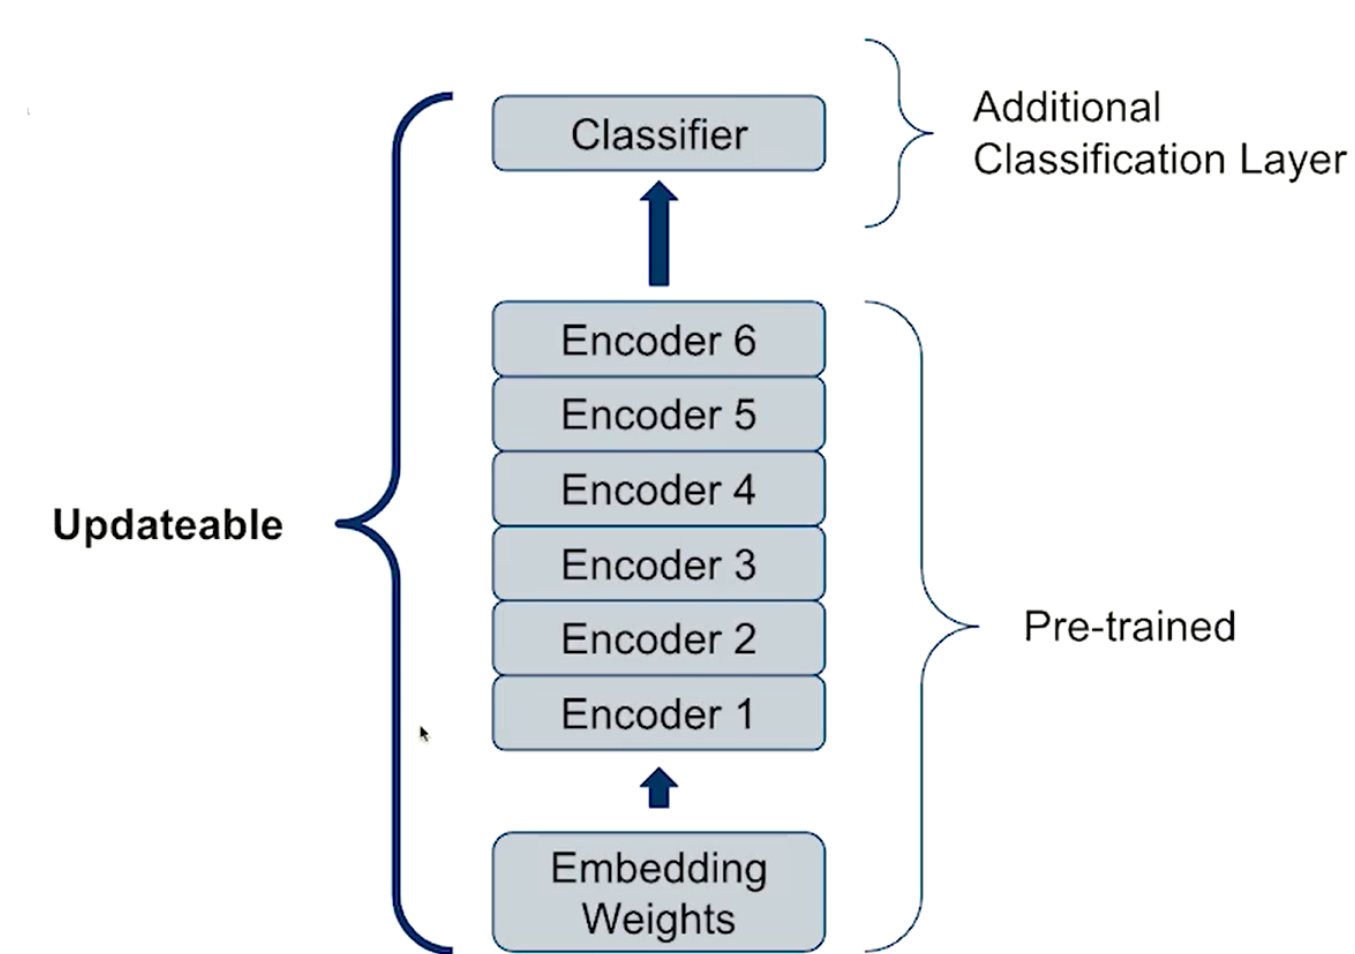

2. Freeze a subset of the model
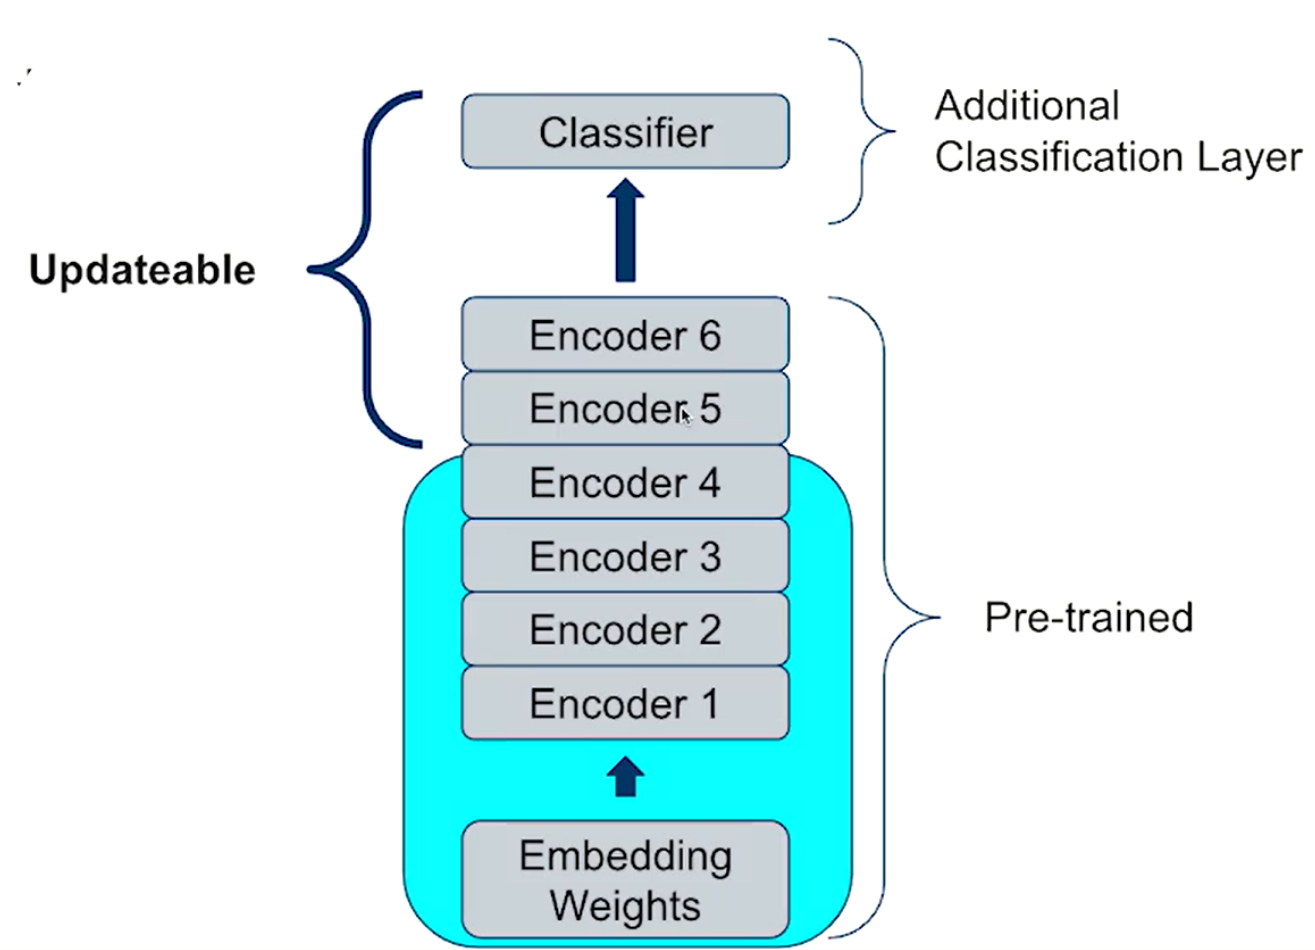

3. Freeze the whole model and only train the additional layers added on top

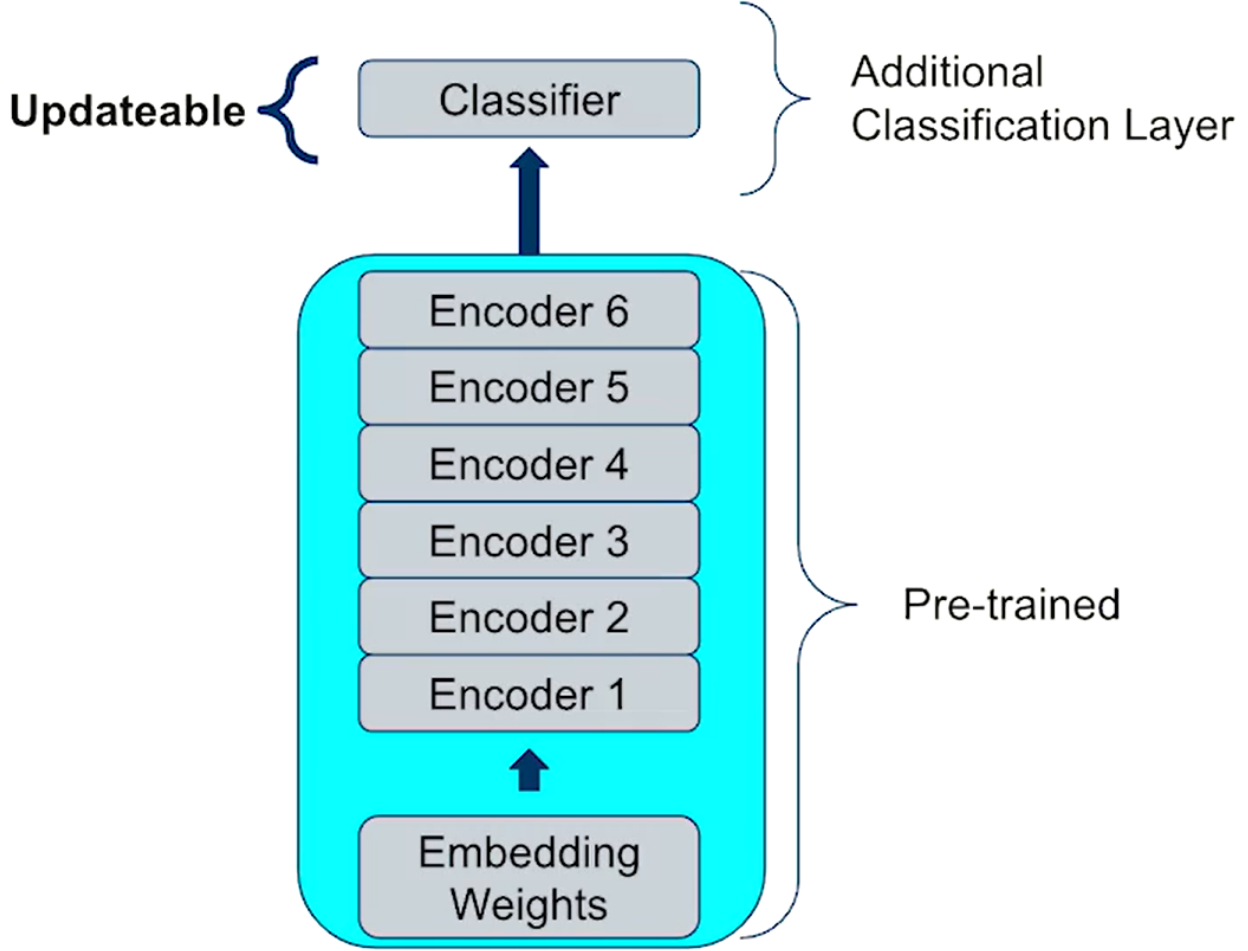

Finetuning with `HuggingFace's Trainer`

Provides a higher-level interface that encapsulates many of the complexities involved in the training loop, making it more convenient for users to train models 

Dataset - Holds all data and splits into training/testing sets
DataCollator - Forms batches of data from Datasets
TrainingArguments - Keeps track of training arguments like saving
strategy and learning rate scheduler parameters
Trainer - API to the Pytorch training loop for most standard cases

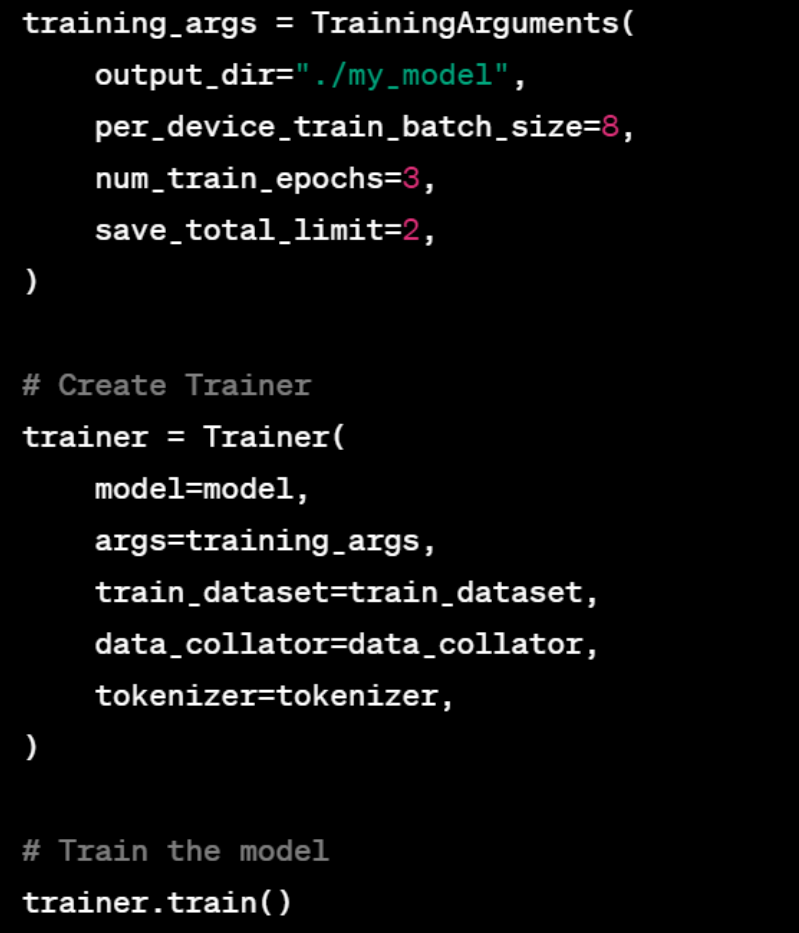

In [3]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
model_name = "bert-base-uncased"
model = BertModel.from_pretrained(model_name)

tokenizer = BertTokenizer.from_pretrained(model_name)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [19]:
from transformers import pipeline, BertForQuestionAnswering, BertForTokenClassification, BertForSequenceClassification

In [11]:
bert_sq = BertForSequenceClassification.from_pretrained(model_name,num_labels=3)
bert_sq

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [8]:
bert_sq.classifier

Linear(in_features=768, out_features=3, bias=True)

In [10]:
bert_tc = BertForTokenClassification.from_pretrained(model_name)
bert_tc

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, el

In [12]:
bert_qa = BertForQuestionAnswering.from_pretrained(model_name)
bert_qa

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForQuestionAnswering(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elem

In [17]:
# A fine tuned roberta model from huggingface that was trained on the stanford QA dataset - squad2
model_name = "deepset/roberta-base-squad2"
qa = pipeline(model=model_name,tokenizer=model_name,revision="v1.0",task="question-answering")

qa_text = "Which was his first Pokemon?","Agney has two pokemon, Pikachu and Lucario. Pikachu as his first Pokemon."

qa(*qa_text)

Some weights of the model checkpoint at deepset/roberta-base-squad2 were not used when initializing RobertaForQuestionAnswering: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'score': 0.3225554823875427, 'start': 44, 'end': 51, 'answer': 'Pikachu'}

## BERT for sequence classification

In [1]:
from transformers import Trainer, TrainingArguments, DistilBertForSequenceClassification, DistilBertTokenizerFast, DataCollatorWithPadding
from datasets import load_metric, Dataset
import numpy as np 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# SNIPS (SNIPS Natural Language Understanding benchmark)

snips_train_data = open('/kaggle/input/snips-dataset/SNIPS_train_data.txt')
snips_train_data_labels = open('/kaggle/input/snips-dataset/SNIPS_train_labels.txt')
snips_train_data_sequence_labeling = open('/kaggle/input/snips-dataset/SNIPS_train_label_for_tokens.txt')

snips_train_data = [line.strip() for line in snips_train_data]
sequence_labels = [line.strip() for line in snips_train_data_labels]
snips_train_data_sequence_labeling = [line.strip() for line in [line.strip() for line in snips_train_data_sequence_labeling]]

print(snips_train_data[0])
print(sequence_labels[0])

listen to westbam alumb allergic on google music
PlayMusic


In [3]:
tokenized_data = [sentence.split() for sentence in snips_train_data]
labels_for_tokens = [sentence.split() for sentence in snips_train_data_sequence_labeling]

print(tokenized_data[0])
print(labels_for_tokens[0])

['listen', 'to', 'westbam', 'alumb', 'allergic', 'on', 'google', 'music']
['O', 'O', 'B-artist', 'O', 'B-album', 'O', 'B-service', 'I-service']


In [4]:
unique_sequence_labels = list(set(sequence_labels))
unique_sequence_labels

['SearchScreeningEvent',
 'AddToPlaylist',
 'BookRestaurant',
 'GetWeather',
 'PlayMusic',
 'RateBook',
 'SearchCreativeWork']

In [5]:
sequence_labels = [unique_sequence_labels.index(i) for i in sequence_labels]

In [6]:
from functools import reduce

unique_token_labels = list(set(reduce(lambda x,y: x+y, labels_for_tokens)))
labels_for_tokens = [[unique_token_labels.index(_) for _ in i] for i in labels_for_tokens]

print(f"There are {len(unique_token_labels)} unique token labels")

There are 72 unique token labels


In [7]:
print(tokenized_data[0])
print(labels_for_tokens[0])
print([unique_token_labels[i] for i in labels_for_tokens[0]])
print(snips_train_data[0])
print(sequence_labels[0])
print(unique_sequence_labels[sequence_labels[0]])

['listen', 'to', 'westbam', 'alumb', 'allergic', 'on', 'google', 'music']
[25, 25, 41, 25, 62, 25, 17, 6]
['O', 'O', 'B-artist', 'O', 'B-album', 'O', 'B-service', 'I-service']
listen to westbam alumb allergic on google music
4
PlayMusic


In [8]:
snips_dataset = Dataset.from_dict(
    dict(
        utterance=snips_train_data,    
        label=sequence_labels,
        tokens=tokenized_data,
        token_labels=labels_for_tokens
        )
)

snips_dataset = snips_dataset.train_test_split(test_size=0.2)

In [100]:
snips_dataset['train'][0]

{'utterance': 'play good pure soul on netflix',
 'label': 0,
 'tokens': ['play', 'good', 'pure', 'soul', 'on', 'netflix'],
 'token_labels': [25, 55, 34, 14, 25, 56]}

In [101]:
# All data in SNIPS is lowercased
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [102]:
def preprocessor(examples):    
    return tokenizer(examples["utterance"],truncation=True) # Anything beyond 512 will be truncated

In [103]:
seq_clf_tokenized_snips = snips_dataset.map(preprocessor, batched=True)

  0%|          | 0/11 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

In [104]:
seq_clf_tokenized_snips['train'][0]

{'utterance': 'play good pure soul on netflix',
 'label': 0,
 'tokens': ['play', 'good', 'pure', 'soul', 'on', 'netflix'],
 'token_labels': [25, 55, 34, 14, 25, 56],
 'input_ids': [101, 2377, 2204, 5760, 3969, 2006, 20907, 102],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

Use DataCollator to create a batch of data, It also dynamically pads text to the length of the longest element in the batch, making them all the same length.

Data Collator will pad data so that all examples are the same input length.
Attention mask is how we ignore attention scores for padding tokens

In [105]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [107]:
# sequence classification model

sequence_clf_model = DistilBertForSequenceClassification.from_pretrained(
                        'distilbert-base-uncased',
                        num_labels = len(unique_sequence_labels)                            
                    )

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [108]:
sequence_clf_model.config.id2label = {i: x for i,x in enumerate(unique_sequence_labels)}

In [109]:
sequence_clf_model.config.id2label[0]

'PlayMusic'

In [110]:
metric = load_metric("accuracy")

def compute_metric(eval_preds):
    logits,labels = eval_preds
    predictions = np.argmax(logits,axis=1)
    return metric.compute(predictions=predictions,references=labels)

In [111]:
import os

# Specify the directory path
results_directory = '/kaggle/working/results'

# Create the directory if it doesn't exist
os.makedirs(results_directory, exist_ok=True)

# Verify that the directory has been created
if os.path.exists(results_directory):
    print(f"Directory '{results_directory}' has been created successfully.")
else:
    print(f"Failed to create directory '{results_directory}'.")

Directory '/kaggle/working/results' has been created successfully.


In [113]:
EPOCHS = 2

training_args = TrainingArguments(
    
    output_dir="/kaggle/working/results",
    num_train_epochs=EPOCHS,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    load_best_model_at_end=True,
    
    warmup_steps = len(seq_clf_tokenized_snips['train']) // 5,
    weight_decay = 0.05,
    
    logging_steps = 1,
    log_level ='info',
    evaluation_strategy ='epoch',
    save_strategy = 'epoch')

trainer = Trainer(        
            model = sequence_clf_model,
            args = training_args,                    
            train_dataset = seq_clf_tokenized_snips['train'],
            eval_dataset = seq_clf_tokenized_snips['test'],
            compute_metrics = compute_metric,            
            data_collator = data_collator
)

In [114]:
trainer.evaluate()

The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: utterance, tokens, token_labels. If utterance, tokens, token_labels are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2617
  Batch size = 32
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


{'eval_loss': 1.947410225868225,
 'eval_accuracy': 0.14291173098968285,
 'eval_runtime': 45.7771,
 'eval_samples_per_second': 57.168,
 'eval_steps_per_second': 1.791}

In [115]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: utterance, tokens, token_labels. If utterance, tokens, token_labels are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 10,467
  Num Epochs = 2
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 656
  Number of trainable parameters = 66,958,855


Epoch,Training Loss,Validation Loss,Accuracy
1,0.287000,0.228009,0.975545
2,0.024300,0.060666,0.987390


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: utterance, tokens, token_labels. If utterance, tokens, token_labels are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2617
  Batch size = 32
Saving model checkpoint to /kaggle/working/results/tmp-checkpoint-328
Configuration saved in /kaggle/working/results/tmp-checkpoint-328/config.json
Model weights saved in /kaggle/working/results/tmp-checkpoint-328/pytorch_model.bin
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: utterance, tokens, token_labels. If utterance, tokens, token_labels are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2

TrainOutput(global_step=656, training_loss=0.7127909856626946, metrics={'train_runtime': 1535.9183, 'train_samples_per_second': 13.63, 'train_steps_per_second': 0.427, 'total_flos': 116936966869314.0, 'train_loss': 0.7127909856626946, 'epoch': 2.0})

In [118]:
# Testing our model

pipe = pipeline("text-classification", sequence_clf_model, tokenizer=tokenizer)
pipe("Add Can't Take My Eyes Off You to my Beatles playlist")         

[{'label': 'AddToPlaylist', 'score': 0.9886701107025146}]

In [119]:
trainer.save_model()

Saving model checkpoint to /kaggle/working/results
Configuration saved in /kaggle/working/results/config.json
Model weights saved in /kaggle/working/results/pytorch_model.bin


In [121]:
pipe = pipeline("text-classification", "/kaggle/working/results", tokenizer=tokenizer)
pipe("Please book a table for 2 at the Imperial Sushi for Sunday afteroon")  

loading configuration file /kaggle/working/results/config.json
Model config DistilBertConfig {
  "_name_or_path": "/kaggle/working/results",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "PlayMusic",
    "1": "AddToPlaylist",
    "2": "GetWeather",
    "3": "SearchCreativeWork",
    "4": "BookRestaurant",
    "5": "RateBook",
    "6": "SearchScreeningEvent"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "

[{'label': 'BookRestaurant', 'score': 0.9878103733062744}]

In [122]:
# Fine tuning by 
# only updating the final layers in DistilBert

frozen_sequence_clf_model = DistilBertForSequenceClassification.from_pretrained(
                        'distilbert-base-uncased',
                        num_labels = len(unique_sequence_labels)                            
                    )

for params in frozen_sequence_clf_model.distilbert.parameters():
    params.requires_grad = False
    
EPOCHS = 2

training_args = TrainingArguments(
    
    output_dir="/kaggle/working/results",
    num_train_epochs=EPOCHS,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    load_best_model_at_end=True,
    
    warmup_steps = len(seq_clf_tokenized_snips['train']) // 5,
    weight_decay = 0.05,
    
    logging_steps = 1,
    log_level ='info',
    evaluation_strategy ='epoch',
    save_strategy = 'epoch')

trainer = Trainer(        
            model = frozen_sequence_clf_model,
            args = training_args,                    
            train_dataset = seq_clf_tokenized_snips['train'],
            eval_dataset = seq_clf_tokenized_snips['test'],
            compute_metrics = compute_metric,            
            data_collator = data_collator
)    

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411/config.json
Model config DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.36.0",
  "vocab_size": 30522
}

loading 

In [123]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: utterance, tokens, token_labels. If utterance, tokens, token_labels are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 10,467
  Num Epochs = 2
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 656
  Number of trainable parameters = 595,975
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"


Epoch,Training Loss,Validation Loss,Accuracy
1,1.829200,1.868597,0.568972
2,1.504300,1.574015,0.833397


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: utterance, tokens, token_labels. If utterance, tokens, token_labels are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2617
  Batch size = 32
Checkpoint destination directory /kaggle/working/results/checkpoint-328 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Saving model checkpoint to /kaggle/working/results/checkpoint-328
Configuration saved in /kaggle/working/results/checkpoint-328/config.json
Model weights saved in /kaggle/working/results/checkpoint-328/pytorch_model.bin
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: utterance, tokens, token_labels. If utterance, tokens, token_labels are not

TrainOutput(global_step=656, training_loss=1.8444593586936229, metrics={'train_runtime': 484.9802, 'train_samples_per_second': 43.165, 'train_steps_per_second': 1.353, 'total_flos': 116936966869314.0, 'train_loss': 1.8444593586936229, 'epoch': 2.0})

In [125]:
pipe = pipeline("text-classification", frozen_sequence_clf_model, tokenizer=tokenizer)
pipe("Please book a table for 2 at the Imperial Sushi for Sunday afteroon")  

[{'label': 'LABEL_4', 'score': 0.1893148422241211}]

## BERT for Token classification (Named Entity Recognition on SNIPS)

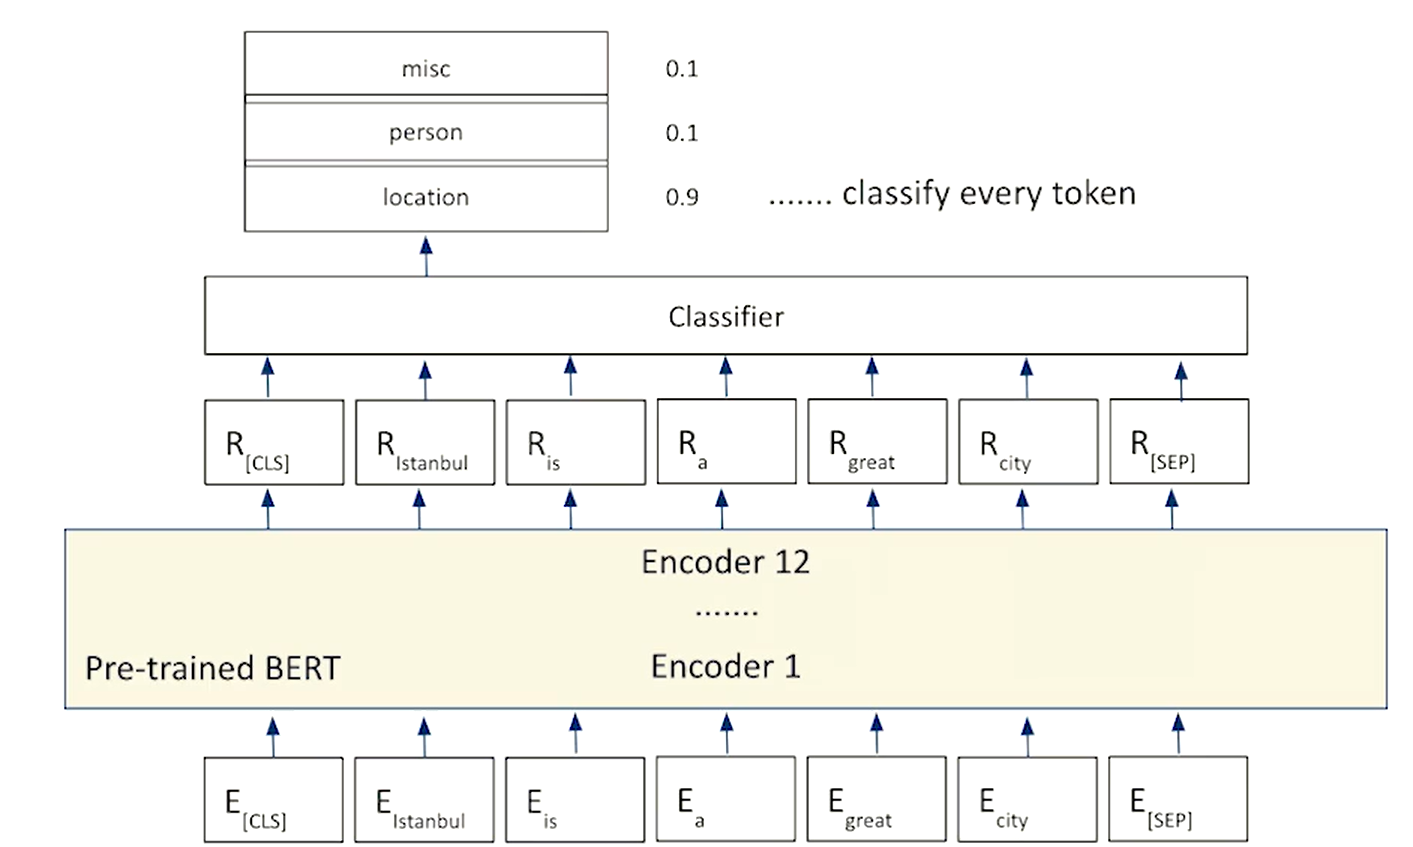

In [35]:
from transformers import Trainer, TrainingArguments, DistilBertForTokenClassification, DistilBertTokenizerFast, DataCollatorForTokenClassification, pipeline
from datasets import load_metric, Dataset
import numpy as np 

In [37]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411/vocab.txt
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411/tokenizer_config.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropo

In [38]:
snips_dataset['train'][0]

{'utterance': 'play the latest ep from lobby loyde on netflix',
 'label': 4,
 'tokens': ['play',
  'the',
  'latest',
  'ep',
  'from',
  'lobby',
  'loyde',
  'on',
  'netflix'],
 'token_labels': [25, 25, 71, 12, 25, 41, 68, 25, 17]}

In [39]:
def tokenize_and_align_labels(examples):
    
    tokenize_inputs = tokenizer(examples["tokens"],truncation = True, is_split_into_words=True)
    
    labels = []
    
    for i,label in enumerate(examples[f"token_labels"]):        
        word_ids = tokenize_inputs.word_ids(batch_index=i)                                           
        previous_word_idx = None
        label_ids = []
                                      
        for word_idx in word_ids:
            if word_idx is None:
                label_ids.append(-100)    # if the word is None meaning the token is [CLS]/[SEP] it should be ignored                    
            elif word_idx != previous_word_idx :  # Only label the first token of a given word.
                label_ids.append(label[word_idx])                          
            else:                
                label_ids.append(-100)                       
            previous_word_idx = word_idx                        
        labels.append(label_ids)                                
                                          
    tokenize_inputs["labels"] = labels
    return tokenize_inputs                                               

In [40]:
tok_clf_tokenized_snips = snips_dataset.map(tokenize_and_align_labels, batched=True)

  0%|          | 0/11 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

In [41]:
tok_clf_tokenized_snips["train"][0]

{'utterance': 'play the latest ep from lobby loyde on netflix',
 'label': 4,
 'tokens': ['play',
  'the',
  'latest',
  'ep',
  'from',
  'lobby',
  'loyde',
  'on',
  'netflix'],
 'token_labels': [25, 25, 71, 12, 25, 41, 68, 25, 17],
 'input_ids': [101,
  2377,
  1996,
  6745,
  4958,
  2013,
  9568,
  8840,
  18124,
  2006,
  20907,
  102],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'labels': [-100, 25, 25, 71, 12, 25, 41, 68, -100, 25, 17, -100]}

In [42]:
tok_clf_tokenized_snips["train"] = tok_clf_tokenized_snips["train"].remove_columns(
                                    ['utterance','label','tokens','token_labels']
                                    )

tok_clf_tokenized_snips["test"] = tok_clf_tokenized_snips["test"].remove_columns(
                                    ['utterance','label','tokens','token_labels']
                                    )

In [43]:
tok_clf_tokenized_snips

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 10467
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 2617
    })
})

In [44]:
unique_token_labels[:5]

['B-rating_unit',
 'B-geographic_poi',
 'B-playlist',
 'I-entity_name',
 'B-restaurant_type']

In [45]:
tok_data_collator =  DataCollatorForTokenClassification(tokenizer=tokenizer)

tok_clf_model = DistilBertForTokenClassification.from_pretrained('distilbert-base-uncased',num_labels=len(unique_token_labels))

tok_clf_model.config.id2label = {i:x for i,x in enumerate(unique_token_labels)}

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411/config.json
Model config DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12",
    "13": "LABEL_13",
    "14": "LABEL_14",
    "15": "LABEL_15",
    "16": "LABEL_16",
    "17": "LABEL_17",
    "18": "LABEL_18",
    "19": "LABEL_19",
    "20": "LABEL_20",
    "21": "LABEL_21",
    "22": "LABEL_22",
    "23": "LABEL_23",
    "24": "LABEL_24",
    "25": "LABEL_25",
    "26": "LABEL_26",
    "27": "LABEL_27",
    "28": "LABEL_28

In [46]:
tok_clf_model.config.id2label[0],tok_clf_model.config.id2label[1]

('B-rating_unit', 'B-geographic_poi')

In [47]:
EPOCHS = 2

training_args = TrainingArguments(    
    output_dir="/kaggle/working/results",
    num_train_epochs=EPOCHS,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    load_best_model_at_end=True,
       
    logging_steps = 10,
    log_level ='info',
    evaluation_strategy ='epoch',
    save_strategy = 'epoch')

trainer = Trainer(        
            model = tok_clf_model,
            args = training_args,                    
            train_dataset = tok_clf_tokenized_snips["train"],
            eval_dataset =tok_clf_tokenized_snips["test"],          
            data_collator = tok_data_collator
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [48]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 2617
  Batch size = 64
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"


{'eval_loss': 4.204598426818848,
 'eval_runtime': 2.0682,
 'eval_samples_per_second': 1265.34,
 'eval_steps_per_second': 19.824}

In [49]:
trainer.train()

***** Running training *****
  Num examples = 10,467
  Num Epochs = 2
  Instantaneous batch size per device = 32
  Training with DataParallel so batch size has been adjusted to: 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 328
  Number of trainable parameters = 66,418,248


Epoch,Training Loss,Validation Loss
1,0.378200,0.285522
2,0.202800,0.180775


***** Running Evaluation *****
  Num examples = 2617
  Batch size = 64
Checkpoint destination directory /kaggle/working/results/checkpoint-164 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Saving model checkpoint to /kaggle/working/results/checkpoint-164
Configuration saved in /kaggle/working/results/checkpoint-164/config.json
Model weights saved in /kaggle/working/results/checkpoint-164/pytorch_model.bin
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
***** Running Evaluation *****
  Num examples = 2617
  Batch size = 64
Checkpoint destination directory /kaggle/working/results/checkpoint-328 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Saving model checkpoint to /kaggle/working/resul

TrainOutput(global_step=328, training_loss=0.6579223976629537, metrics={'train_runtime': 54.5125, 'train_samples_per_second': 384.022, 'train_steps_per_second': 6.017, 'total_flos': 125641682715024.0, 'train_loss': 0.6579223976629537, 'epoch': 2.0})

In [53]:
# Testing our model
pipe = pipeline("token-classification", tok_clf_model, tokenizer=tokenizer,device=0)
pipe("Add Can't Take My Eyes Off You to my GT4 playlist")         

[{'entity': 'B-entity_name',
  'score': 0.77954686,
  'index': 2,
  'word': 'can',
  'start': 4,
  'end': 7},
 {'entity': 'I-entity_name',
  'score': 0.9016336,
  'index': 3,
  'word': "'",
  'start': 7,
  'end': 8},
 {'entity': 'I-entity_name',
  'score': 0.90357286,
  'index': 4,
  'word': 't',
  'start': 8,
  'end': 9},
 {'entity': 'I-entity_name',
  'score': 0.9079559,
  'index': 5,
  'word': 'take',
  'start': 10,
  'end': 14},
 {'entity': 'I-entity_name',
  'score': 0.9186888,
  'index': 6,
  'word': 'my',
  'start': 15,
  'end': 17},
 {'entity': 'I-entity_name',
  'score': 0.916982,
  'index': 7,
  'word': 'eyes',
  'start': 18,
  'end': 22},
 {'entity': 'I-entity_name',
  'score': 0.91571635,
  'index': 8,
  'word': 'off',
  'start': 23,
  'end': 26},
 {'entity': 'I-entity_name',
  'score': 0.91619277,
  'index': 9,
  'word': 'you',
  'start': 27,
  'end': 30},
 {'entity': 'B-playlist_owner',
  'score': 0.97003037,
  'index': 11,
  'word': 'my',
  'start': 34,
  'end': 36},
 {'

## BERT for Q/A (trained on AdversarialQA)

BERT and architecure derivated from BERT uses Extractive Answering - Where the answer to a question given a piece of context is a direct substring of the context

Abstractive Answering - The answer to a question given a piece of context is a free-form phrase based on the context. GPT based models are Abstractive, requires a decoder.

Example:

Question: "What is Matt like?"
Context: "Matt is the kind of guy who will always be there for you."

Extractive Answer  :  "The kind of guy who will always be there for you"
Abstractive Answer :  "A great guy"


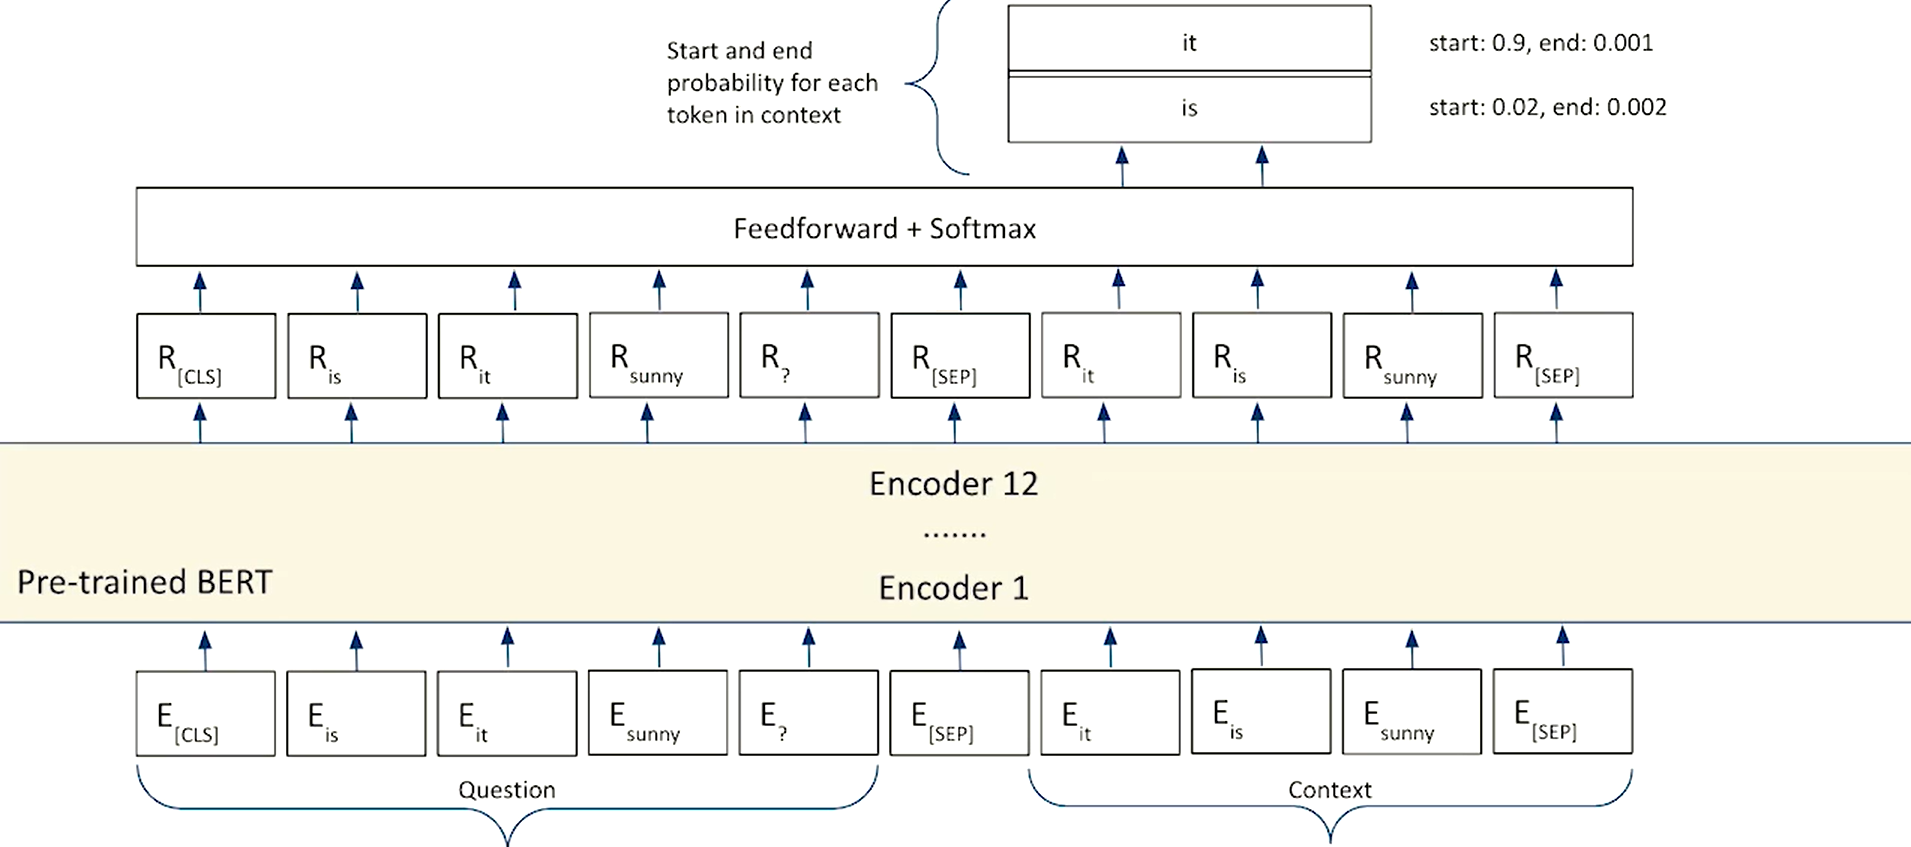

In [2]:
from transformers import Trainer, TrainingArguments, DataCollatorWithPadding, pipeline,\
                         BertTokenizerFast,BertForQuestionAnswering,AutoTokenizer, AutoModelForQuestionAnswering
from datasets import load_metric, Dataset
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
import requests

In [3]:
model_name = 'bert-large-uncased'
bert_tokenizer = BertTokenizerFast.from_pretrained(model_name, return_token_type_ids=True)

qa_bert = BertForQuestionAnswering.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-large-uncased and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
from datasets import load_dataset

dataset = load_dataset('adversarial_qa', 'adversarialQA')
dataset

Generating train split:   0%|          | 0/30000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3000 [00:00<?, ? examples/s]

Dataset adversarial_qa downloaded and prepared to /root/.cache/huggingface/datasets/adversarial_qa/adversarialQA/1.0.0/92356be07b087c5c6a543138757828b8d61ca34de8a87807d40bbc0e6c68f04b. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers', 'metadata'],
        num_rows: 30000
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers', 'metadata'],
        num_rows: 3000
    })
    test: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers', 'metadata'],
        num_rows: 3000
    })
})

In [5]:
print(dataset.column_names)

{'train': ['id', 'title', 'context', 'question', 'answers', 'metadata'], 'validation': ['id', 'title', 'context', 'question', 'answers', 'metadata'], 'test': ['id', 'title', 'context', 'question', 'answers', 'metadata']}


In [6]:
len(dataset['train'].column_names)

6

In [7]:
print(dataset['train'][:1]) 

{'id': ['7ba1e8f4261d3170fcf42e84a81dd749116fae95'], 'title': ['Brain'], 'context': ['Another approach to brain function is to examine the consequences of damage to specific brain areas. Even though it is protected by the skull and meninges, surrounded by cerebrospinal fluid, and isolated from the bloodstream by the blood–brain barrier, the delicate nature of the brain makes it vulnerable to numerous diseases and several types of damage. In humans, the effects of strokes and other types of brain damage have been a key source of information about brain function. Because there is no ability to experimentally control the nature of the damage, however, this information is often difficult to interpret. In animal studies, most commonly involving rats, it is possible to use electrodes or locally injected chemicals to produce precise patterns of damage and then examine the consequences for behavior.'], 'question': ['What sare the benifts of the blood brain barrir?'], 'answers': [{'text': ['iso

In [8]:
print('Question : ',dataset['train'][:1]['question'][0])

Question :  What sare the benifts of the blood brain barrir?


In [9]:
print('Context : ',dataset['train'][:1]['context'][0])

Context :  Another approach to brain function is to examine the consequences of damage to specific brain areas. Even though it is protected by the skull and meninges, surrounded by cerebrospinal fluid, and isolated from the bloodstream by the blood–brain barrier, the delicate nature of the brain makes it vulnerable to numerous diseases and several types of damage. In humans, the effects of strokes and other types of brain damage have been a key source of information about brain function. Because there is no ability to experimentally control the nature of the damage, however, this information is often difficult to interpret. In animal studies, most commonly involving rats, it is possible to use electrodes or locally injected chemicals to produce precise patterns of damage and then examine the consequences for behavior.


In [10]:
print('Answer : ',dataset['train'][:1]['answers'][0]['text'][0])

Answer :  isolated from the bloodstream


In [11]:
print("start_postion", dataset['train'][:1]['answers'][0]['answer_start'][0]) 
print("end_postion", dataset['train'][:1]['answers'][0]['answer_start'][0] + len(dataset['train'][:1]['answers'][0]['text'][0]) - 1)

start_postion 195
end_postion 223


In [12]:
def preprocessor(data):
        return bert_tokenizer(data['question'],data['context'],truncation=True)
    
qa_dataset = dataset.map(preprocessor,batched=True)    

  0%|          | 0/30 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

In [13]:
for i in qa_dataset['train'][0]['input_ids']:
    print(i, end=' ')          

101 2054 18906 2063 1996 3841 10128 3215 1997 1996 2668 4167 19820 4313 1029 102 2178 3921 2000 4167 3853 2003 2000 11628 1996 8465 1997 4053 2000 3563 4167 2752 1012 2130 2295 2009 2003 5123 2011 1996 7412 1998 2273 23496 2015 1010 5129 2011 8292 2890 12618 13102 13290 8331 1010 1998 7275 2013 1996 2668 21422 2011 1996 2668 1516 4167 8803 1010 1996 10059 3267 1997 1996 4167 3084 2009 8211 2000 3365 7870 1998 2195 4127 1997 4053 1012 1999 4286 1010 1996 3896 1997 13692 1998 2060 4127 1997 4167 4053 2031 2042 1037 3145 3120 1997 2592 2055 4167 3853 1012 2138 2045 2003 2053 3754 2000 6388 2135 2491 1996 3267 1997 1996 4053 1010 2174 1010 2023 2592 2003 2411 3697 2000 17841 1012 1999 4111 2913 1010 2087 4141 5994 11432 1010 2009 2003 2825 2000 2224 28688 2015 2030 7246 19737 12141 2000 3965 10480 7060 1997 4053 1998 2059 11628 1996 8465 2005 5248 1012 102 

##### Preprocessing the dataset to add `start_positions` and `end_positions`

In [14]:
bert_tokenizer(dataset['train'][:1]['answers'][0]['text'][0],truncation=True)['input_ids']

[101, 7275, 2013, 1996, 2668, 21422, 102]

In [15]:
# The start_postions end_positions is 56 and 61 in the tokenized dataset
qa_dataset['train'][0]['input_ids'][56:61]

[7275, 2013, 1996, 2668, 21422]

In [16]:
bert_tokenizer(dataset['train'][:1]['answers'][0]['text'][0],truncation=True)['input_ids']

[101, 7275, 2013, 1996, 2668, 21422, 102]

In [17]:
tokenized_answers = []

def tokenize_answers(entry):    
             
    # Check if the entry is in the train or validation split       
    split = entry['metadata']['split']

    if split in ['train', 'validation']:
            answer_text = entry['answers']['text'][0]
            tokenized_output = bert_tokenizer(answer_text, truncation=True)['input_ids']            
            tokenized_answers.append(tokenized_output)
    

# Tokenize answers for the entire dataset
dataset.map(tokenize_answers)

  0%|          | 0/30000 [00:00<?, ?ex/s]

  0%|          | 0/3000 [00:00<?, ?ex/s]

  0%|          | 0/3000 [00:00<?, ?ex/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers', 'metadata'],
        num_rows: 30000
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers', 'metadata'],
        num_rows: 3000
    })
    test: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers', 'metadata'],
        num_rows: 3000
    })
})

In [18]:
dataset['train'][1:2]['answers'][0]['text'][0]

'brain'

In [19]:
bert_tokenizer.decode(tokenized_answers[1])

'[CLS] brain [SEP]'

In [20]:
len(tokenized_answers)

33000

In [21]:
def create_labels(entry, index):
    split = entry['metadata']['split']
    
    if split in ['train']:
        try:
            start_positions = entry['input_ids'].index(tokenized_answers[index][1])
            end_positions = start_positions + len(tokenized_answers[index]) - 2                            
        
        except ValueError or ArrowNotImplementedError:
            # Handle the case when the value is not found in the list
            start_positions = 0
            end_positions = 0

        entry["start_positions"] = start_positions
        entry["end_positions"] = end_positions

    return entry

# Apply the create_labels function to all instances in the dataset
qa_dataset = qa_dataset.map(create_labels, with_indices=True)

  0%|          | 0/30000 [00:00<?, ?ex/s]

  0%|          | 0/3000 [00:00<?, ?ex/s]

  0%|          | 0/3000 [00:00<?, ?ex/s]

In [22]:
index = 30000
def create_labels_for_validation_set(entry):
    global index
    split = entry['metadata']['split']
    
    if split in ['validation']:        
        try:
            start_positions = entry['input_ids'].index(tokenized_answers[index][1])
            end_positions = start_positions + len(tokenized_answers[index]) - 2                            
        
        except ValueError:
            # Handle the case when the value is not found in the list
            start_positions = 0
            end_positions = 0

        index = index + 1    
        entry["start_positions"] = start_positions
        entry["end_positions"] = end_positions        

    return entry

# Apply the create_labels function to all instances in the dataset
qa_dataset = qa_dataset.map(create_labels_for_validation_set)

  0%|          | 0/30000 [00:00<?, ?ex/s]

  0%|          | 0/3000 [00:00<?, ?ex/s]

  0%|          | 0/3000 [00:00<?, ?ex/s]

In [29]:
# Check if the start and end position for training set is correctly set
print(dataset['train'][:1]['answers'][0]['text'][0])

start_position = qa_dataset['train'][0]['start_positions']
end_position = qa_dataset['train'][0]['end_positions']

print(bert_tokenizer.decode(qa_dataset['train'][0]['input_ids'][start_position:end_position]))

# Check if the start and end position for validation set is correctly set
print(dataset['validation'][:1]['answers'][0]['text'][0])

start_position = qa_dataset['validation'][0]['start_positions']
end_position = qa_dataset['validation'][0]['end_positions']

print(bert_tokenizer.decode(qa_dataset['validation'][0]['input_ids'][start_position:end_position]))

isolated from the bloodstream
isolated from the bloodstream
Town Moor
town moor


In [24]:
for name,param in qa_bert.bert.named_parameters():
    if 'encoder.layer.22' in name:
        break
    param.requires_grad = False    

In [25]:
data_collator = DataCollatorWithPadding(tokenizer = bert_tokenizer)

In [30]:
from transformers import Trainer, TrainingArguments, DataCollatorWithPadding

# Define training arguments
training_args = TrainingArguments(
    output_dir="./adversarial_qa_training",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=2,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    logging_dir="./logs",
    logging_steps=500,
    save_total_limit=2,
    load_best_model_at_end=True,
)

# Define data collator
data_collator = DataCollatorWithPadding(tokenizer=bert_tokenizer)

# Create Trainer
trainer = Trainer(
    model=qa_bert,
    args=training_args,
    train_dataset=qa_dataset["train"],
    eval_dataset=qa_dataset["validation"],
    data_collator=data_collator,
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()

# Display training and evaluation loss
print(f"Training Loss: {trainer.state.global_step}, {trainer.state.epoch}, {trainer.state.total_flos}, {trainer.state.log_history}")
print(f"Evaluation Loss: {results}")


wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss
1,4.114900,3.950139
2,3.762800,3.785963


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Training Loss: 3750, 2.0, 3.417075800207712e+16, [{'loss': 4.4793, 'learning_rate': 4.3333333333333334e-05, 'epoch': 0.27, 'step': 500}, {'loss': 4.1798, 'learning_rate': 3.6666666666666666e-05, 'epoch': 0.53, 'step': 1000}, {'loss': 4.1149, 'learning_rate': 3e-05, 'epoch': 0.8, 'step': 1500}, {'eval_loss': 3.950138568878174, 'eval_runtime': 94.4486, 'eval_samples_per_second': 31.763, 'eval_steps_per_second': 1.991, 'epoch': 1.0, 'step': 1875}, {'loss': 4.0116, 'learning_rate': 2.3333333333333336e-05, 'epoch': 1.07, 'step': 2000}, {'loss': 3.8525, 'learning_rate': 1.6666666666666667e-05, 'epoch': 1.33, 'step': 2500}, {'loss': 3.8256, 'learning_rate': 1e-05, 'epoch': 1.6, 'step': 3000}, {'loss': 3.7628, 'learning_rate': 3.3333333333333333e-06, 'epoch': 1.87, 'step': 3500}, {'eval_loss': 3.7859625816345215, 'eval_runtime': 94.136, 'eval_samples_per_second': 31.869, 'eval_steps_per_second': 1.997, 'epoch': 2.0, 'step': 3750}, {'train_runtime': 3780.5066, 'train_samples_per_second': 15.871

In [ ]:
# In case the model we use is not an instance of BertForQuestionAnswering 
# we can define the loss function as below

# import torch.nn as nn
# import torch

# class CustomQALoss(nn.Module):
#     def __init__(self):
#         super(CustomQALoss, self).__init__()

#     def forward(self, start_logits, end_logits, start_positions, end_positions):
#         # Compute CrossEntropyLoss for both start and end positions
#         loss_fn = nn.CrossEntropyLoss()
#         start_loss = loss_fn(start_logits, start_positions)
#         end_loss = loss_fn(end_logits, end_positions)

#         # Total loss is the sum of start and end losses
#         total_loss = start_loss + end_loss

#         return total_loss

# loss_fn = CustomQALoss()      

# def compute_loss(model, inputs):
#     outputs = model(**inputs)
#     start_logits, end_logits = outputs.logits

#     # Calculate your custom loss
#     loss = loss_fn(start_logits, end_logits, inputs["start_positions"], inputs["end_positions"])

#     # Return a dictionary with the loss for logging during both training and evaluation
#     return {"loss": loss.item(), "eval_loss": loss.item()}

# metric = load_metric("squad")

# def compute_metrics(p):
#     predictions, labels = p   
#     predictions = postprocess_qa_predictions(predictions, n_best_size=20) 
#     formatted_predictions = [{"id": k, "prediction_text": v} for k,v in predictions.items()]
#     references = [{"id": ex["id"], "answers": ex["answers"]} for ex in labels]    
#     result = metric.compute(predictions=formatted_predictions, references=references)
#     return result

# The trainer has to be passed with train_step=compute_loss parameter as well
# trainer = Trainer(
#     model=qa_bert,
#     args=training_args,
#     train_dataset=qa_dataset["train"],
#     eval_dataset=qa_dataset["validation"],
#     data_collator=data_collator,
#     train_step=compute_loss,
#     compute_metric = compute_metrics
# )

In [35]:
pipe = pipeline("question-answering",qa_bert,tokenizer=bert_tokenizer,device=0)
pipe("What does Riolu evolve to?", "Riolu is a small, blue, canine Pokémon. It has a black torso and legs, a blue tail, and a yellow collar. Riolu evolves into Lucario.")

{'score': 0.013685980811715126, 'start': 31, 'end': 39, 'answer': 'Pokémon.'}

In [36]:
trainer.save_model()

In [51]:
PERSON = "Agney Praseed"

google_html = BeautifulSoup(requests.get(f'https://www.google.com/search?q={PERSON}').text).get_text()[:512]

pipe(f"What is {PERSON}'s job''?",google_html)

{'score': 0.008603894151747227,
 'start': 382,
 'end': 399,
 'answer': 'professional with'}

In [46]:
from IPython.display import Markdown
Markdown(google_html)

Agney Praseed - Google SearchGoogle×Please click here if you are not redirected within a few seconds.    AllImagesVideosNews Maps Shopping Books Search tools    Any timeAny timePast hourPast 24 hoursPast weekPast monthPast yearAll resultsAll resultsVerbatimAgney Praseed - Engineer at Publicis Sapient - LinkedInin.linkedin.com › agney-praseedI am a highly motivated and passionate professional with 1 year of experience as a Java backend developer. My expertise lies in full stack development, ...80+ "Praseed" 

In [60]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Move the model to the specified device
qa_bert.to(device)
qa_input = bert_tokenizer(
    "What does Riolu evolve to?",
    "Riolu is a small, blue, canine Pokémon. It has a black torso and legs, a blue tail, and a yellow collar. Riolu evolves into Lucario.",
    return_tensors='pt'
).to(device)

# Forward pass on the model
output = qa_bert(**qa_input)

/tmp/ipykernel_42/2735668363.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=[f'{i} - {t}' for i, t in enumerate(token_labels)], y=output.start_logits.squeeze().tolist(), ci=None)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


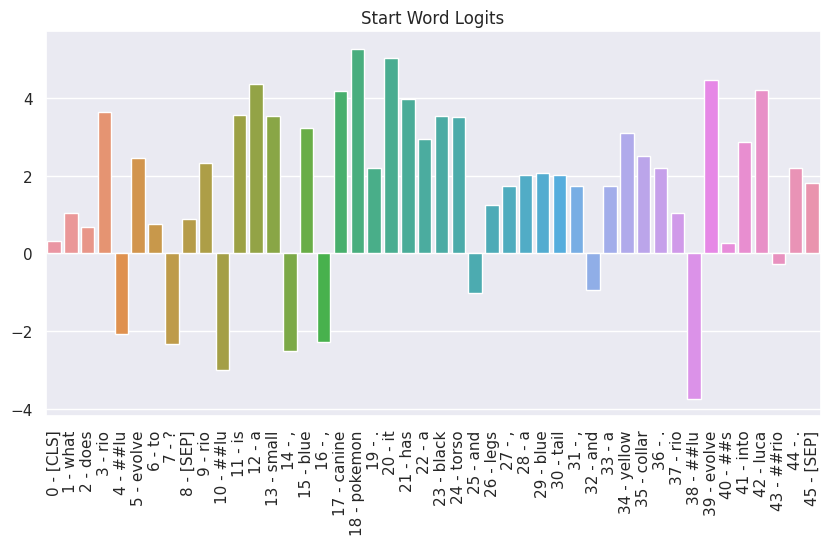

/tmp/ipykernel_42/2735668363.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=[f'{i} - {t}' for i, t in enumerate(token_labels)], y=output.end_logits.squeeze().tolist(), ci=None)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


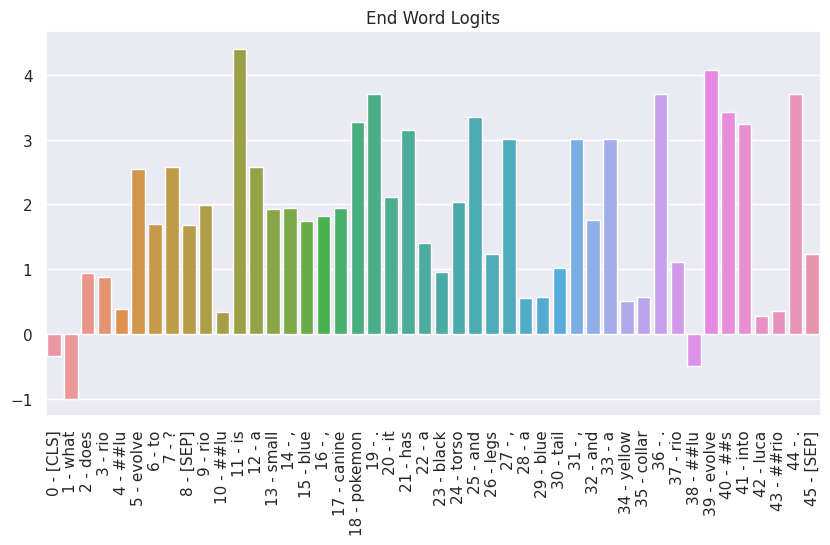

In [64]:
# Visualize our model output

sns.set(rc={"figure.figsize":(10,5)})

# Convert the PyTorch tensor to a Python list using .tolist()
ax = sns.barplot(x=[f'{i} - {t}' for i, t in enumerate(token_labels)], y=output.start_logits.squeeze().tolist(), ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.title('Start Word Logits')
plt.show()

ax = sns.barplot(x=[f'{i} - {t}' for i, t in enumerate(token_labels)], y=output.end_logits.squeeze().tolist(), ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.title('End Word Logits')
plt.show()


In [48]:
# Using a model trianed on squad dataset
squad_pipe = pipeline("question-answering","bert-large-uncased-whole-word-masking-finetuned-squad")

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [49]:
squad_pipe("What does Riolu evolve to?", "Riolu is a small, blue, canine Pokémon. It has a black torso and legs, a blue tail, and a yellow collar. Riolu evolves into Lucario.")

{'score': 0.9848446846008301, 'start': 124, 'end': 131, 'answer': 'Lucario'}

In [52]:
squad_pipe(f"What is {PERSON}'s job''?",google_html)

{'score': 0.6010642051696777, 'start': 273, 'end': 281, 'answer': 'Engineer'}

In [66]:
large_tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")

qa_input = large_tokenizer("What does Riolu evolve to?", "Riolu is a small, blue, canine Pokémon. It has a black torso and legs, a blue tail, and a yellow collar. Riolu evolves into Lucario.",return_tensors='pt')

large_qa_bert = AutoModelForQuestionAnswering.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")

output = large_qa_bert(**qa_input)

token_labels = large_tokenizer.convert_ids_to_tokens(qa_input['input_ids'].squeeze())

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


/tmp/ipykernel_42/1094646070.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=[f'{i} - {t}' for i,t in enumerate(token_labels)], y=output.start_logits.squeeze().tolist(),ci=None)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


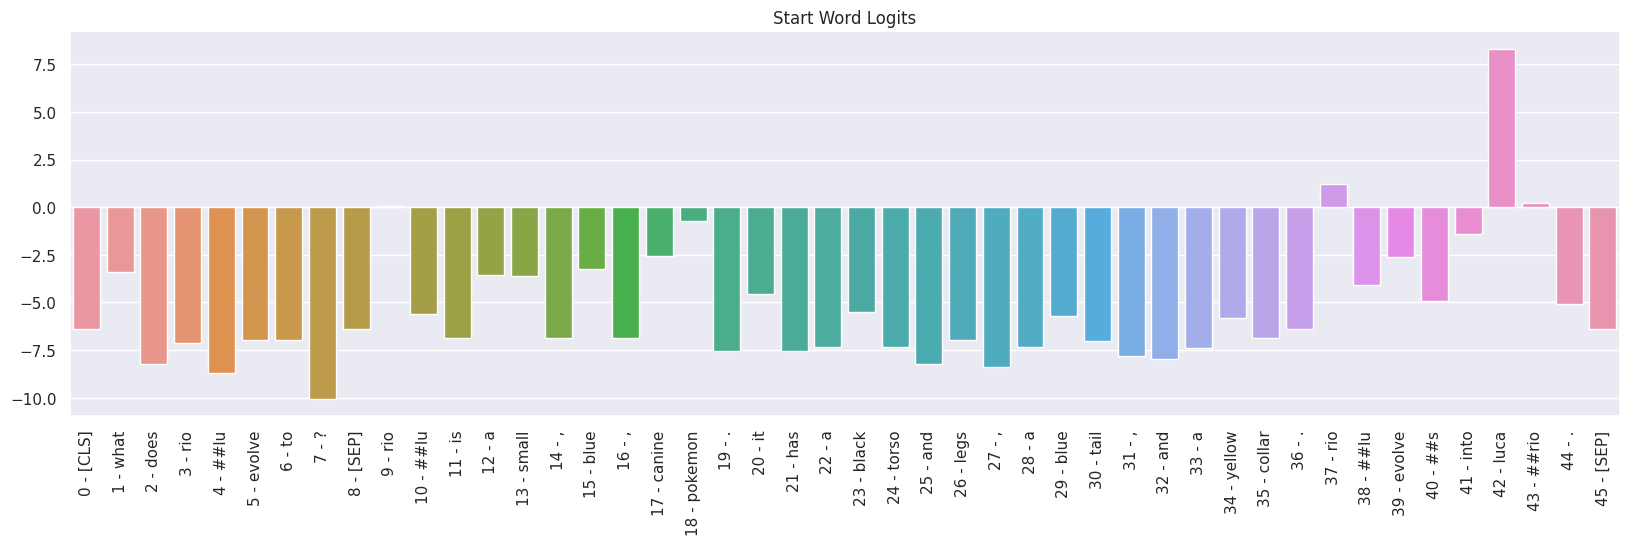

/tmp/ipykernel_42/1094646070.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=[f'{i} - {t}' for i,t in enumerate(token_labels)], y=output.end_logits.squeeze().tolist(),ci=None)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


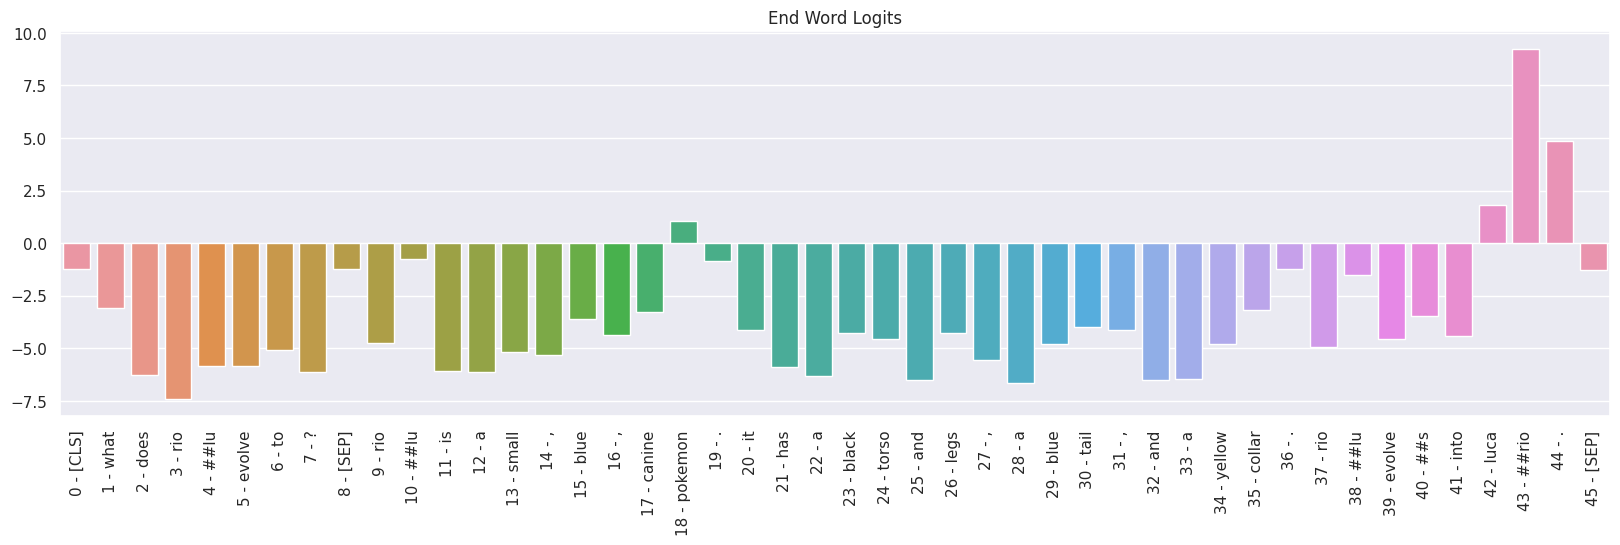

In [68]:
sns.set(rc={"figure.figsize":(20,5)})
ax = sns.barplot(x=[f'{i} - {t}' for i,t in enumerate(token_labels)], y=output.start_logits.squeeze().tolist(),ci=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha="center")
plt.title('Start Word Logits')
plt.show()

ax = sns.barplot(x=[f'{i} - {t}' for i,t in enumerate(token_labels)], y=output.end_logits.squeeze().tolist(),ci=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha="center")
plt.title('End Word Logits')
plt.show()